In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
pd.set_option('display.max_columns', None)
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [2]:
schema = pd.read_csv('./survey_results_schema.csv')
pd.set_option("max_colwidth",None)
pd.set_option("max_rows", None)
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"


In [3]:

# Extract only USA data
dfUSA = df.loc[df['Country']=="United States",  ['MajorUndergrad','YearsProgram','EmploymentStatus','Salary']]
# Drop all NA rows
dfUSA = dfUSA.dropna()
dfUSA.head(10)

,MajorUndergrad,YearsProgram,EmploymentStatus,Salary
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0
76,Computer engineering or electrical/electronics engineering,20 or more years,Employed full-time,96283.0
81,Computer science or software engineering,17 to 18 years,Employed full-time,110000.0
83,Computer science or software engineering,20 or more years,Employed full-time,165000.0
99,Computer science or software engineering,20 or more years,Employed full-time,109400.0
103,Something else,1 to 2 years,Employed full-time,51000.0


In [4]:
# Consider only Full Time employment status

dfUSA_fulltime = dfUSA[dfUSA.EmploymentStatus== "Employed full-time"]

dfUSA_fulltime.head()

,MajorUndergrad,YearsProgram,EmploymentStatus,Salary
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0


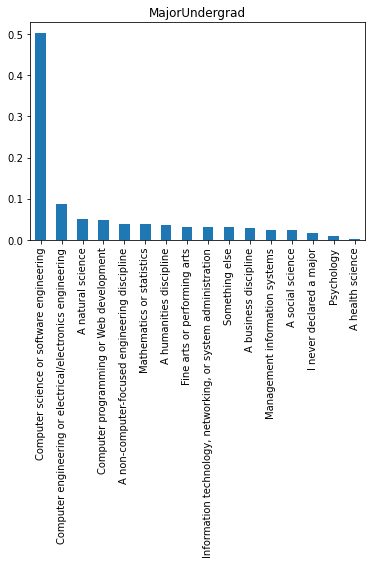

In [5]:
# Count of MajorUndergrad
major_undergrad  = dfUSA_fulltime.MajorUndergrad.value_counts()
# Bar chart proportion of MajorUndergrad
(major_undergrad/dfUSA_fulltime.shape[0]).plot(kind="bar");
plt.title("MajorUndergrad");

In [6]:

# Dropping all the " I dont know ", I prefer not to answer" or "Something else"
exclude = [ "I never declared a major", "Something else"]
major_new= dfUSA_fulltime[~dfUSA_fulltime['MajorUndergrad'].isin(exclude)]
major_new.head()

,MajorUndergrad,YearsProgram,EmploymentStatus,Salary
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0


In [7]:
# Counting
major1 = major_new.MajorUndergrad.value_counts()
major1
#major1/major_new.shape[0].plot(kind = "bar");
#plt.title("MajorUndergrad")

Computer science or software engineering                        1815
Computer engineering or electrical/electronics engineering       312
A natural science                                                181
Computer programming or Web development                          176
A non-computer-focused engineering discipline                    141
Mathematics or statistics                                        138
A humanities discipline                                          132
Fine arts or performing arts                                     115
Information technology, networking, or system administration     112
A business discipline                                            104
Management information systems                                    91
A social science                                                  83
Psychology                                                        33
A health science                                                   7
Name: MajorUndergrad, dtype: int64

In [14]:
non_computer_focused =  ["A health science", "Psychology", "A social science", "Management information systems", "A business discipline", "Fine arts or performing arts","A humanities discipline", "Mathematics or statistics", "A non-computer-focused engineering discipline" , "A natural science" ]
computer_focused = ["Computer science or software engineering","Computer engineering or electrical/electronics engineering","Computer programming or Web development","Information technology, networking, or system administration"  ]


non_computer_focused = major_new[major_new['MajorUndergrad'].isin (non_computer_focused)]
non_computer_focused.head()



,MajorUndergrad,YearsProgram,EmploymentStatus,Salary,IsComputerRelated
123,A natural science,11 to 12 years,Employed full-time,115000.0,True
219,A non-computer-focused engineering discipline,2 to 3 years,Employed full-time,50000.0,True
237,Management information systems,8 to 9 years,Employed full-time,80000.0,True
241,A non-computer-focused engineering discipline,9 to 10 years,Employed full-time,81000.0,True
258,A business discipline,20 or more years,Employed full-time,65000.0,True


In [12]:
non_computer_focused =  ["A health science", "Psychology", "A social science", "Management information systems", "A business discipline", "Fine arts or performing arts","A humanities discipline", "Mathematics or statistics", "A non-computer-focused engineering discipline" , "A natural science" ]
computer_focused = ["Computer science or software engineering","Computer engineering or electrical/electronics engineering","Computer programming or Web development","Information technology, networking, or system administration"  ]

major_new['IsComputerRelated'] = np.where(major_new.loc[:,'MajorUndergrad'].isin (non_computer_focused), True, False)


<ipython-input-12-ae29ad7077ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_new['IsComputerRelated'] = np.where(major_new.loc[:,'MajorUndergrad'].isin (non_computer_focused), True, False)


In [18]:
computer_focused = ["Computer science or software engineering","Computer engineering or electrical/electronics engineering","Computer programming or Web development","Information technology, networking, or system administration"  ]


computer_focused = major_new[major_new['MajorUndergrad'].isin (computer_focused)]
computer_focused.head()



,MajorUndergrad,YearsProgram,EmploymentStatus,Salary,IsComputerRelated
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0,False
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0,False
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0,False
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0,False
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0,False


In [24]:
a = computer_focused
b = non_computer_focused
computer_related_major = pd.concat([a,b])
computer_related_major.tail()

,MajorUndergrad,YearsProgram,EmploymentStatus,Salary,IsComputerRelated
51022,A business discipline,14 to 15 years,Employed full-time,125000.0,True
51126,A social science,10 to 11 years,Employed full-time,95000.0,True
51127,Fine arts or performing arts,20 or more years,Employed full-time,80000.0,True
51266,A business discipline,10 to 11 years,Employed full-time,80000.0,True
51387,A social science,6 to 7 years,Employed full-time,58000.0,True


In [32]:
c = computer_related_major
major_related = c[['YearsProgram','IsComputerRelated', 'Salary']]
major_related.head()


,YearsProgram,IsComputerRelated,Salary
17,20 or more years,False,130000.0
18,2 to 3 years,False,82500.0
25,20 or more years,False,175000.0
70,2 to 3 years,False,65000.0
72,20 or more years,False,120000.0


In [47]:
df_final = major_related.groupby(["YearsProgram","IsComputerRelated"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
df_final



IsComputerRelated,False,True
YearsProgram,,
1 to 2 years,70377.777778,73984.444444
10 to 11 years,85940.110000,97150.487179
11 to 12 years,94400.855670,99000.000000
12 to 13 years,92701.108434,98199.760000
13 to 14 years,103884.722222,92666.666667
14 to 15 years,100023.484389,102655.769231
15 to 16 years,105861.591837,96310.000000
16 to 17 years,103338.680556,102631.578947
17 to 18 years,110122.611765,107119.400000


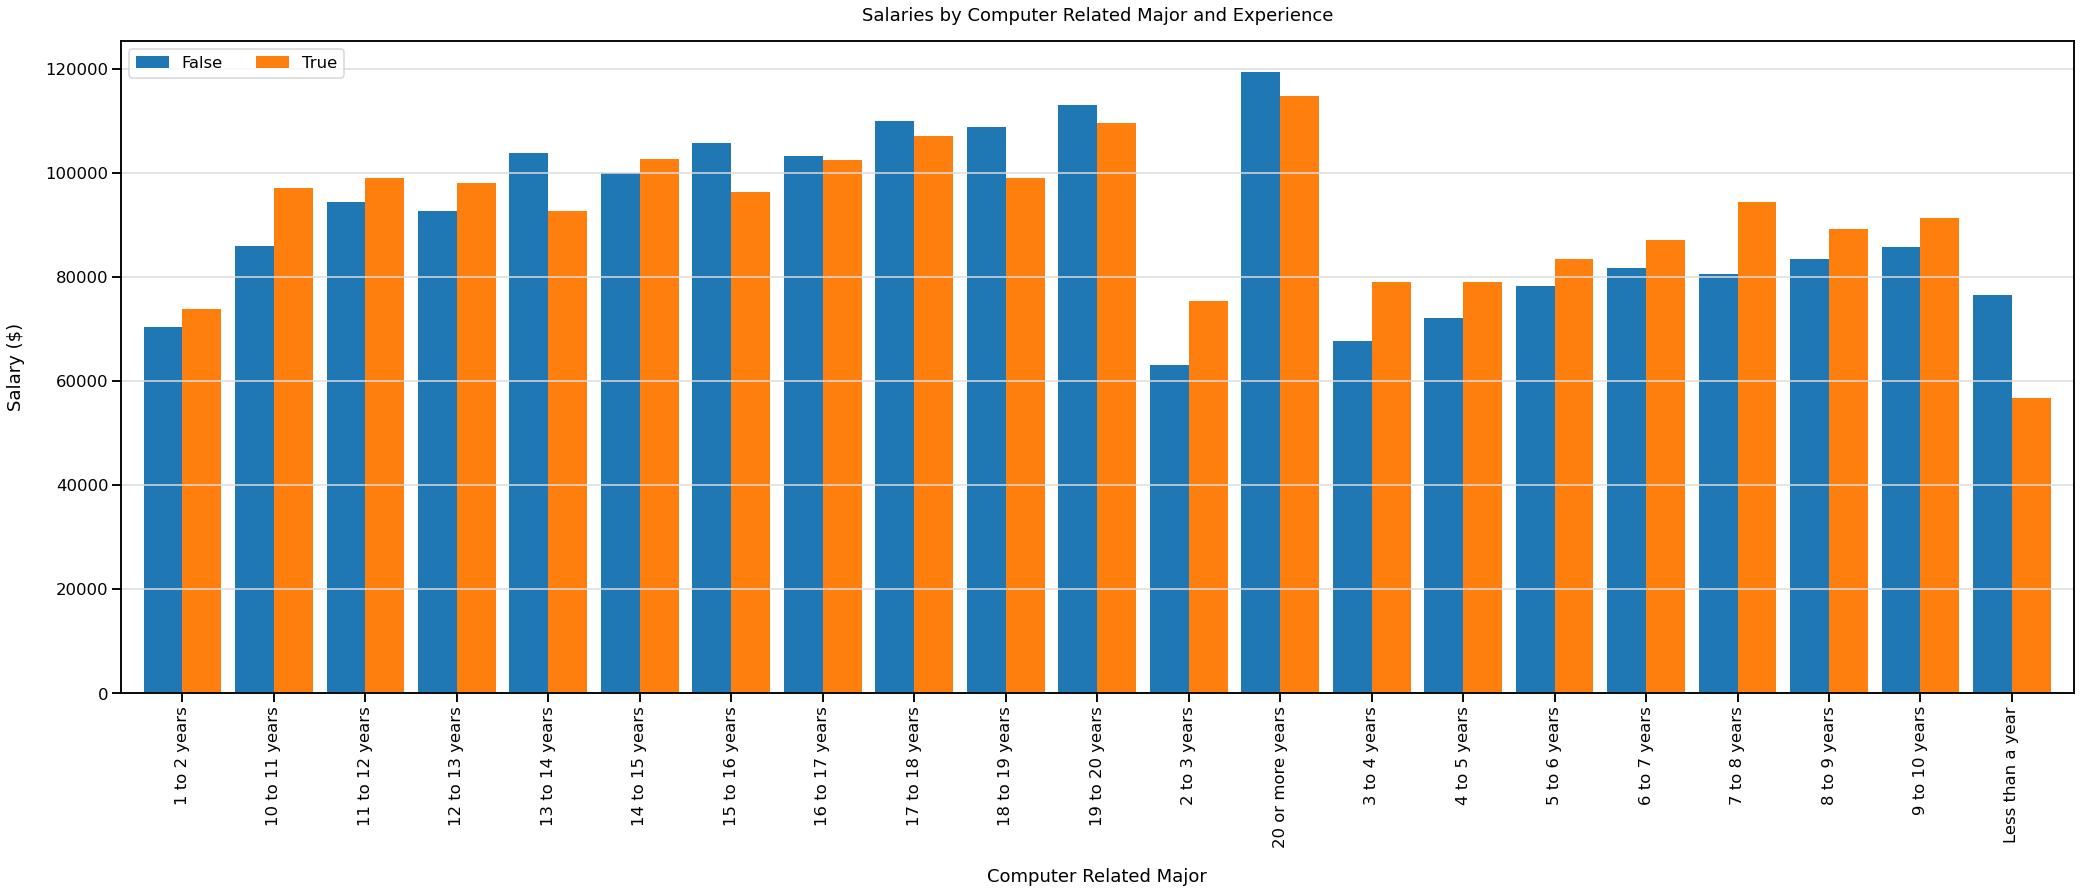

In [52]:
# create the clustered chart
sns.set_context('talk')
plot = df_final.plot.bar(figsize=(35, 12), width=.85)
plot.legend(loc="upper left",ncol=len(df_final))
plot.set_xlabel('Computer Related Major', labelpad=20)
plot.set_ylabel('Salary ($)', labelpad=20)
plot.set_title('Salaries by Computer Related Major and Experience', pad=20)
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)